In [211]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sb 
from matplotlib import style
import warnings
warnings.filterwarnings('ignore')

In [422]:
df= pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Train.csv')
df.head()


,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [213]:
df.shape

(8523, 12)

In [214]:
df['Item_Type'].value_counts()  # categorical columns

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

In [215]:
df.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

there are null values in item weight and in outlet size

# Data cleaning 

In [216]:
df['Outlet_Size']=df['Outlet_Size'].fillna(df['Outlet_Size'].mode()[0])

In [217]:
df['Outlet_Size'].isnull().sum()

0

In [218]:
df['Item_Weight'].isnull().sum()

1463

In [219]:
df['Item_Weight']=df['Item_Weight'].fillna(df['Item_Weight'].mean())

In [220]:
df['Item_Weight'].isnull().sum()

0

In [221]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# Explotary Data analysis

### Through countplot we analyze the categorical columns 


her we divide all the categorical categorical columns and continous columns 

In [222]:
df.columns 

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

categorical columns:-

    1.Item_identifier                            
    2.Item_fat_content                           
    3.Item_type                                  
    4.Outlet_Identifier                          
    5.Outlet_Size                                
    6.Outlet_Location_type
    7.Outlet_type

In [223]:
# here we see the continous feature columns 
df.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


<AxesSubplot:xlabel='Item_Fat_Content', ylabel='count'>

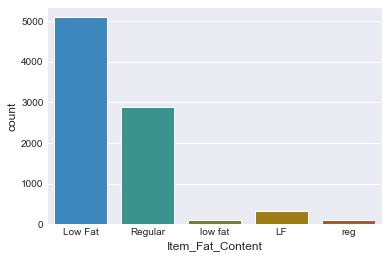

In [224]:
# Analysize the catergorical columns
sb.countplot(data=df,x=df['Item_Fat_Content'])

<AxesSubplot:xlabel='Item_Type', ylabel='count'>

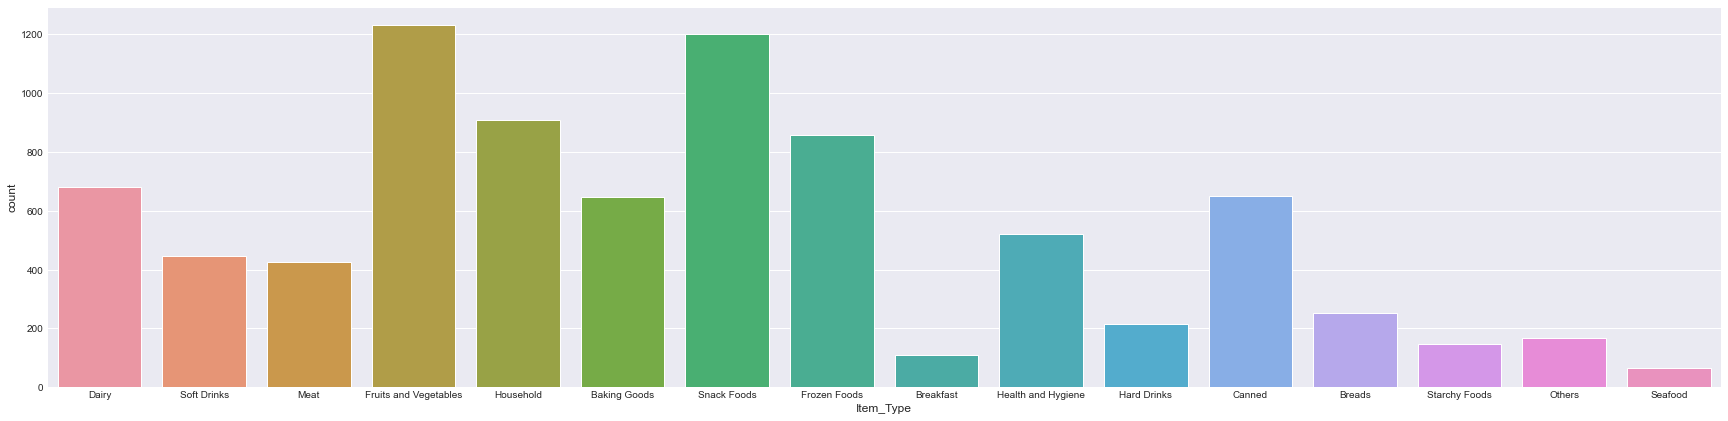

In [225]:
plt.figure(figsize=(30,7))
sb.countplot(data=df,x=df['Item_Type'])

<AxesSubplot:xlabel='Outlet_Size', ylabel='count'>

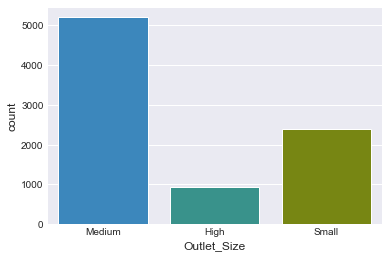

In [226]:

sb.countplot(data=df,x=df['Outlet_Size'])

<AxesSubplot:xlabel='Outlet_Location_Type', ylabel='count'>

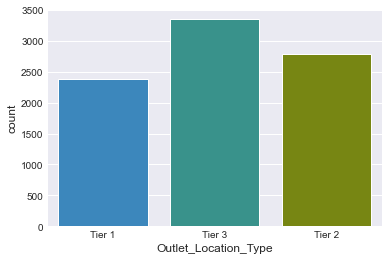

In [227]:

sb.countplot(data=df,x=df['Outlet_Location_Type'])

<AxesSubplot:xlabel='Outlet_Type', ylabel='count'>

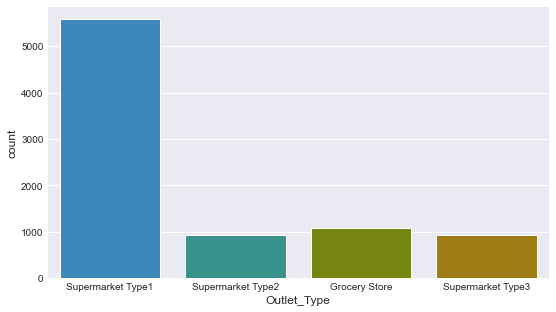

In [228]:
plt.figure(figsize=(9,5))
sb.countplot(data=df,x=df['Outlet_Type'])

In categorical columns we have to use the encoder techineque to transform into numeric values, 
for this we use
Label Encoder

In [229]:
from sklearn.preprocessing import LabelEncoder

In [230]:
le=LabelEncoder()
df['Item_Identifier']=le.fit_transform(df['Item_Identifier'])

In [231]:
df['Item_Fat_Content']=le.fit_transform(df['Item_Fat_Content'])
df['Item_Type']=le.fit_transform(df['Item_Type'])
df['Outlet_Size']=le.fit_transform(df['Outlet_Size'])
df['Outlet_Location_Type']=le.fit_transform(df['Outlet_Location_Type'])
df['Outlet_Type']=le.fit_transform(df['Outlet_Type'])
df['Outlet_Identifier']=le.fit_transform(df['Outlet_Identifier'])




In [232]:
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,156,9.30,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,8,5.92,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,662,17.50,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,1121,19.20,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,1297,8.93,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052


<AxesSubplot:>

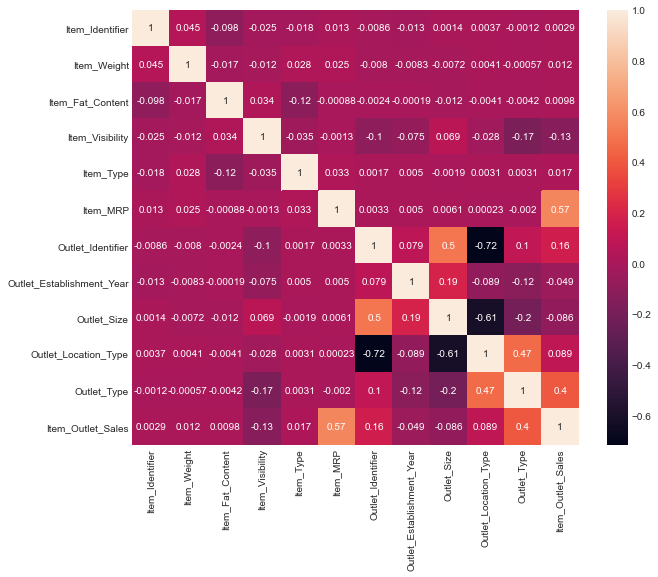

In [407]:
plt.figure(figsize=(10,8))
sb.heatmap(df.corr(),annot=True)

<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

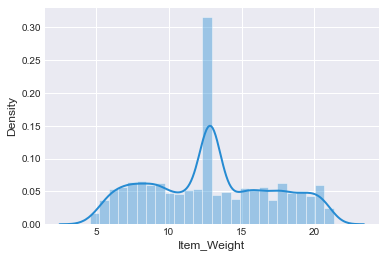

In [233]:
# analysize continous columns
sb.distplot(df['Item_Weight'])

Text(0.5, 0, 'Item_Weight')

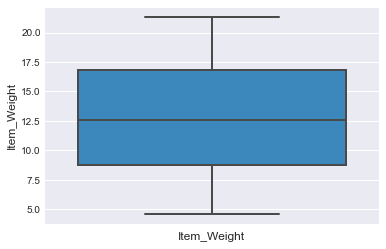

In [458]:
# checking outliers:-
sb.boxplot(data=df,y='Item_Weight')
plt.xlabel('Item_Weight')

not any outliers 

<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

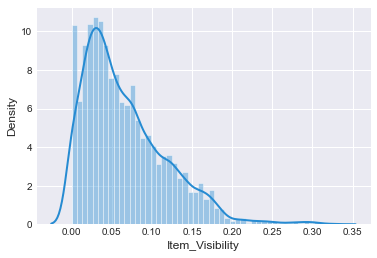

In [234]:
sb.distplot(df['Item_Visibility'])

<AxesSubplot:ylabel='Item_Visibility'>

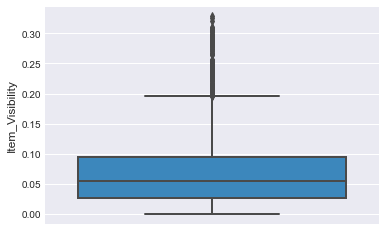

In [235]:
sb.boxplot(y=df['Item_Visibility'])

In [236]:
ser=pd.Series(df['Item_Visibility'])
q1=ser.quantile(0.25)
q3=ser.quantile(0.75)
iqr=q3-q1
upside=q3 + (1.5*iqr)

In [237]:
upside

0.195979015

In [238]:
df1=df[df['Item_Visibility']<upside]
df1.reset_index()

,index,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,156,9.300,1,0.016047,4,249.8092,9,1999,1,0,1,3735.1380
1,1,8,5.920,2,0.019278,14,48.2692,3,2009,1,2,2,443.4228
2,2,662,17.500,1,0.016760,10,141.6180,9,1999,1,0,1,2097.2700
3,3,1121,19.200,2,0.000000,6,182.0950,0,1998,1,2,0,732.3800
4,4,1297,8.930,1,0.000000,9,53.8614,1,1987,0,2,1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8374,8518,370,6.865,1,0.056783,13,214.5218,1,1987,0,2,1,2778.3834
8375,8519,897,8.380,2,0.046982,0,108.1570,7,2002,1,1,1,549.2850
8376,8520,1357,10.600,1,0.035186,8,85.1224,6,2004,2,1,1,1193.1136
8377,8521,681,7.210,2,0.145221,13,103.1332,3,2009,1,2,2,1845.5976


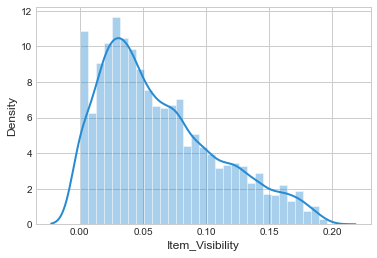

In [239]:
plt.style.use("seaborn-whitegrid")

sb.distplot(df1['Item_Visibility'])
sb.set_style('darkgrid')

<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

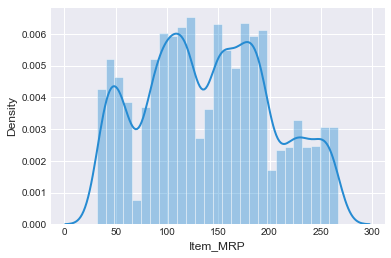

In [240]:
sb.distplot(df['Item_MRP'])

here it is not the univariant

Text(0.5, 0, 'Item_MRP')

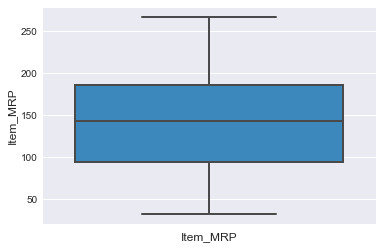

In [456]:
# cheacking outliers:-
sb.boxplot(data=df,y=df['Item_MRP'])
plt.xlabel('Item_MRP')

there is no outlier present 

In [459]:
from sklearn.preprocessing import power_transform

In [461]:
df

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [243]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score

In [244]:
maxr2=0
maxrs=0

for i in range(0,200):
    x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=i,test_size=0.25)
    lr=LinearRegression()
    lr.fit(x_train,y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test,pred)
    print('r2_score',acc,'randomstate',i,'\n')
    
    if acc>maxr2:
        maxr2=acc
        maxrs=i
        print('max_accuracy',maxr2,'maxrs',i)

r2_score 0.5086024129906213 randomstate 0 

max_accuracy 0.5086024129906213 maxrs 0
r2_score 0.5080119801076577 randomstate 1 

r2_score 0.5139978028539811 randomstate 2 

max_accuracy 0.5139978028539811 maxrs 2
r2_score 0.5366222089899544 randomstate 3 

max_accuracy 0.5366222089899544 maxrs 3
r2_score 0.5031176571682682 randomstate 4 

r2_score 0.5138497972094851 randomstate 5 

r2_score 0.5115382703166709 randomstate 6 

r2_score 0.49411829378876704 randomstate 7 

r2_score 0.5143329020995373 randomstate 8 

r2_score 0.5055861715845028 randomstate 9 

r2_score 0.5079426864038468 randomstate 10 

r2_score 0.4908054039231202 randomstate 11 

r2_score 0.5116186655146449 randomstate 12 

r2_score 0.5065392296480271 randomstate 13 

r2_score 0.5105704986009673 randomstate 14 

r2_score 0.5220471422119959 randomstate 15 

r2_score 0.5059206200903532 randomstate 16 

r2_score 0.5162412002301835 randomstate 17 

r2_score 0.4973694653946934 randomstate 18 

r2_score 0.5075242020537132 random

r2_score 0.520950924864434 randomstate 179 

r2_score 0.5120079225806007 randomstate 180 

r2_score 0.5065773360968884 randomstate 181 

r2_score 0.48015749587244183 randomstate 182 

r2_score 0.49005854220678335 randomstate 183 

r2_score 0.5161881579207749 randomstate 184 

r2_score 0.5217853450677329 randomstate 185 

r2_score 0.5243634175255174 randomstate 186 

r2_score 0.5160114830085585 randomstate 187 

r2_score 0.507535937863409 randomstate 188 

r2_score 0.5081998213409864 randomstate 189 

r2_score 0.4959277676635866 randomstate 190 

r2_score 0.5056508549164156 randomstate 191 

r2_score 0.4918577731784364 randomstate 192 

r2_score 0.5274298291873 randomstate 193 

r2_score 0.5331894483320627 randomstate 194 

r2_score 0.5138035899440976 randomstate 195 

r2_score 0.5148257749454457 randomstate 196 

r2_score 0.5273773631441108 randomstate 197 

r2_score 0.5020955742563633 randomstate 198 

r2_score 0.528044146805293 randomstate 199 



In [268]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=3,test_size=0.25)

In [463]:
c=df[['Item_Weight','Item_Visibility','Item_MRP']]

# LinearRegression

In [469]:
fg=power_transform(c)
fgg=pd.DataFrame(fg)
fgg.columns=c.columns

In [269]:
lr=LinearRegression()
lr.fit(x_train,y_train)

LinearRegression()

In [470]:
fgg

,Item_Weight,Item_Visibility,Item_MRP
0,-0.728063,-1.146886,1.623670
1,-1.601121,-1.037100,-1.595016
2,0.995373,-1.122375,0.081237
3,1.309505,-1.745551,0.689968
4,-0.817205,-1.745551,-1.476078
...,...,...,...
8518,-1.342185,0.020310,1.148258
8519,-0.952267,-0.221388,-0.463127
8520,-0.424772,-0.542979,-0.867930
8521,-1.250866,1.459990,-0.548996


In [270]:
lr_predict=lr.predict(x_test)
r2_score(y_test,lr_predict)

0.5366222089899544

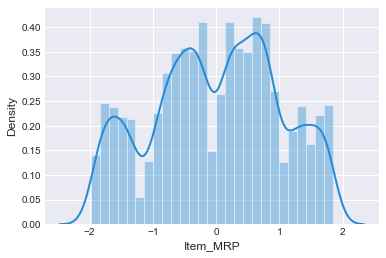

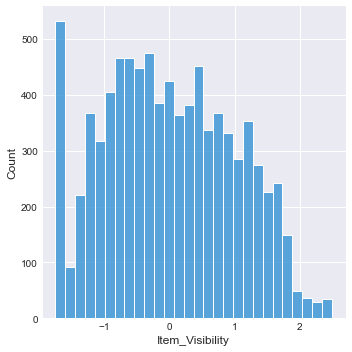

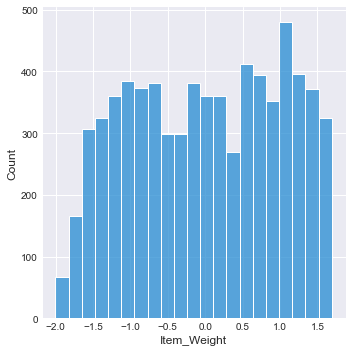

In [478]:

sb.distplot(fgg['Item_MRP'])

sb.displot(fgg['Item_Visibility'])

sb.displot(fgg['Item_Weight'])

In [242]:
x=df.drop('Item_Outlet_Sales',axis=1)
y=df['Item_Outlet_Sales']

# Decision Tree Regressor

In [271]:
from sklearn.tree import DecisionTreeRegressor

In [272]:
dt=DecisionTreeRegressor()
dt.fit(x_train,y_train)

DecisionTreeRegressor()

In [273]:
dt_predict=dt.predict(x_test)
r2_score(y_test,dt_predict)

0.19180475573551636

# K-Nearest-neighbour

In [274]:
from sklearn.neighbors import KNeighborsRegressor

In [275]:
knn=KNeighborsRegressor()
knn.fit(x_train,y_train)

KNeighborsRegressor()

In [276]:
knn_predict= knn.predict(x_test)

In [277]:
r2_score(y_test,knn_predict)

0.208092669460071

# ADA boostregressor

In [278]:
from sklearn.ensemble import AdaBoostRegressor
adb=AdaBoostRegressor()

In [279]:
adb.fit(x_train,y_train)

AdaBoostRegressor()

In [280]:
adb_predict=adb.predict(x_test)
r2_score(y_test,adb_predict)

0.5435638534383238

# Random forest

In [281]:
from sklearn.ensemble import RandomForestRegressor
rd=RandomForestRegressor()
rd.fit(x_train,y_train)

RandomForestRegressor()

In [282]:
rd_predict=rd.predict(x_test)
r2_score(y_test,rd_predict)

0.5755698322294456

# Gradient boosting

In [283]:
from sklearn.ensemble import GradientBoostingRegressor
gd=GradientBoostingRegressor()

In [284]:
gd.fit(x_train,y_train)

GradientBoostingRegressor()

In [285]:
gd_predict=gd.predict(x_test)

In [286]:
r2_score(y_test,gd_predict)

0.6234063173837253

# Xtream gradient boosting

In [386]:
import xgboost
xgb=xgboost
xg=xgb.XGBRegressor()
xg

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, gamma=None,
             gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=None,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, predictor=None, random_state=None,
             reg_alpha=None, reg_lambda=None, ...)

In [387]:
xg.fit(x_train,y_train)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.300000012, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=6, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=100, n_jobs=0,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, ...)

In [388]:
xg_predict=xg.predict(x_test)

In [389]:
r2_score(y_test,xg_predict)

0.5429375405559267

# Extra tree regressor

In [305]:
from sklearn.tree import ExtraTreeRegressor
et=ExtraTreeRegressor()

In [307]:
et.fit(x_train,y_train)

ExtraTreeRegressor()

In [309]:
et_predict=et.predict(x_test)

In [311]:
r2_score(y_test,et_predict)

0.13382393988646146

# using regularization method for better performance

In [314]:
from sklearn.linear_model import LassoCV,RidgeCV,Ridge,Lasso

In [324]:
lassocv=LassoCV(max_iter=100,normalize=True,alphas=None)
lassocv.fit(x_train,y_train)

LassoCV(max_iter=100, normalize=True)

In [325]:
parameter=lassocv.alpha_


In [329]:
lasso_reg=Lasso(parameter)
lasso_reg.fit(x_train,y_train)

Lasso(alpha=0.07865000640153097)

In [331]:
lasso_reg.score(x_test,y_test)

0.5366273467286022

In [343]:
ridg=RidgeCV(alphas=np.arange(0.001,0.1,0.01),normalize=True)
ridg.fit(x_train,y_train)

RidgeCV(alphas=array([0.001, 0.011, 0.021, 0.031, 0.041, 0.051, 0.061, 0.071, 0.081,
       0.091]),
        normalize=True)

In [345]:
ridg.alpha_

0.001

In [348]:
ridge_reg=Ridge(alpha=ridg.alpha_)
ridge_reg.fit(x_train,y_train)

Ridge(alpha=0.001)

In [353]:
ridge_reg.score(x_test,y_test)

0.5366222261100754

In [293]:
from sklearn.svm import SVR
svm=SVR()

In [295]:
svm.fit(x_train,y_train)

SVR()

 it still showing the same result, so model is working at its best 

### Analyze if model is underfitted or overfitted i am using cross validation techinque

In [356]:
from sklearn.model_selection import cross_val_score

In [360]:
#decision tree
cvs_dt=cross_val_score(dt,x,y,scoring='r2',cv=6)
cvs_dt.mean()

0.1594029270986599

In [363]:
#knn boosting
cvs_knn=cross_val_score(knn,x,y,scoring='r2',cv=6)
cvs_knn.mean()

0.18720265889508717

In [374]:
#ada boosting
cvs_adb=cross_val_score(adb,x,y,scoring='r2',cv=6)
cvs_adb.mean()

0.4812171272680603

In [378]:
#gradient boosting
cvs_gd=cross_val_score(gd,x,y,scoring='r2',cv=6)
cvs_gd.mean()

0.5948151019762643

In [391]:
# xtream gradient boosting 
cvs_xg=cross_val_score(xg,x,y,scoring='r2',cv=6)
cvs_xg.mean()

0.5288765819895295

here we see the xtream gradient boosting is showing higher score for all the model

# Hyperparameter tuning

In [383]:
from sklearn.model_selection import GridSearchCV

In [395]:
parameters={'criterion':['friedman_mse', 'squared_error', 'mse'],
              'min_samples_split':range(2,10),
                    'max_leaf_nodes':range(2,4),
                       'max_depth':range(10,15)}

In [393]:
GradientBoostingRegressor()

GradientBoostingRegressor()

In [398]:
grid=GridSearchCV(GradientBoostingRegressor(),param_grid=parameters,cv=6)
grid.fit(x_train,y_train)

GridSearchCV(cv=6, estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error', 'mse'],
                         'max_depth': range(10, 15),
                         'max_leaf_nodes': range(2, 4),
                         'min_samples_split': range(2, 10)})

In [400]:
grid.best_params_

{'criterion': 'mse',
 'max_depth': 12,
 'max_leaf_nodes': 3,
 'min_samples_split': 2}

In [402]:
grad=GradientBoostingRegressor(criterion = 'mse',
 max_depth= 12,
 max_leaf_nodes= 3,
 min_samples_split=2)
grad.fit(x_train,y_train)

GradientBoostingRegressor(criterion='mse', max_depth=12, max_leaf_nodes=3)

In [404]:
grad_pred=grad.predict(x_test)

In [405]:
r2_score(y_test,grad_pred)

0.6251328324072021

# Model use for prediction

In [410]:
import pickle
big_mart='Big_mart_model'

In [413]:
pickle.dump(grad,open(big_mart,'wb'))

In [418]:
model_op=pickle.load(open(big_mart,'rb'))
model_op.predict(x_test)

array([2859.1220488 , 1914.62975392,  593.06282135, ..., 4013.66303046,
       2653.04207894, 1736.96198534])

# Data for prediction 

## cleaning the data 

In [420]:
df_train=pd.read_csv('https://raw.githubusercontent.com/dsrscientist/bigdatamart_rep/master/bigdatamart_Test.csv')

In [423]:
df_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [427]:
df_train['Item_Fat_Content']=le.fit_transform(df_train['Item_Fat_Content'])
df_train['Item_Type']=le.fit_transform(df_train['Item_Type'])
df_train['Outlet_Size']=le.fit_transform(df_train['Outlet_Size'])
df_train['Outlet_Location_Type']=le.fit_transform(df_train['Outlet_Location_Type'])
df_train['Outlet_Type']=le.fit_transform(df_train['Outlet_Type'])
df_train['Outlet_Identifier']=le.fit_transform(df_train['Outlet_Identifier'])
df_train['Item_Identifier']=le.fit_transform(df_train['Item_Identifier'])

In [429]:
df_train.sample(5)

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
5221,349,10.395,2,0.000000,4,88.5514,3,2009,1,2,2
1298,587,15.850,2,0.007176,13,40.8480,3,2009,1,2,2
4849,1463,11.500,1,0.021064,8,134.4942,3,2009,1,2,2
854,56,8.895,1,0.105705,4,40.0138,2,2007,3,1,1
2431,877,16.850,2,0.023285,13,45.4428,2,2007,3,1,1


In [431]:
df_train.isnull().sum()

Item_Identifier                0
Item_Weight                  976
Item_Fat_Content               0
Item_Visibility                0
Item_Type                      0
Item_MRP                       0
Outlet_Identifier              0
Outlet_Establishment_Year      0
Outlet_Size                    0
Outlet_Location_Type           0
Outlet_Type                    0
dtype: int64

In [432]:
df_train['Item_Weight']=df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())

In [435]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1103,20.750000,1,0.007565,13,107.8622,9,1999,1,0,1
1,1067,8.300000,4,0.038428,4,87.3198,2,2007,3,1,1
2,1406,14.600000,1,0.099575,11,241.7538,0,1998,3,2,0
3,809,7.315000,1,0.015388,13,155.0340,2,2007,3,1,1
4,1184,12.695633,2,0.118599,4,234.2300,5,1985,1,2,3
...,...,...,...,...,...,...,...,...,...,...,...
5676,231,10.500000,2,0.013496,13,141.3154,8,1997,2,0,1
5677,306,7.600000,2,0.142991,15,169.1448,3,2009,1,2,2
5678,1412,10.000000,1,0.073529,8,118.7440,7,2002,3,1,1
5679,517,15.300000,2,0.000000,3,214.6218,2,2007,3,1,1


# Model prediction 

In [437]:
model_predict=model_op.predict(df_train)

In [453]:
model_predict

array([1715.16810224, 1394.71363691,  942.39133784, ..., 1911.21773051,
       3562.84862014, 1291.84454227])